In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,  accuracy_score
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("D:\\creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

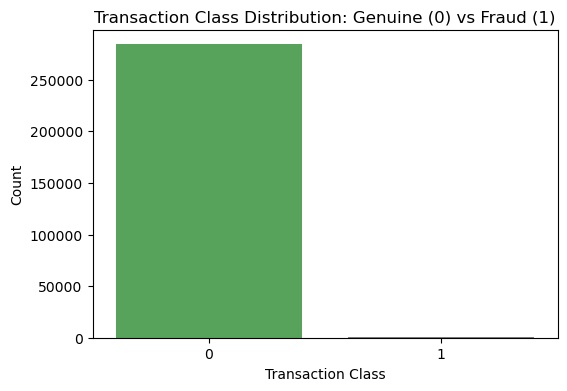

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='Class', 
    data=df, 
    palette=['#4CAF50', '#F44336'] 
)
plt.title("Transaction Class Distribution: Genuine (0) vs Fraud (1)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

In [5]:
normal_transactions = df[df['Class'] == 0]
fraudulent_transactions = df[df['Class'] == 1]

print(" Dataset Split Based on Transaction Type:")
print(f"Normal Transactions: {normal_transactions.shape[0]} rows")
print(f"Fraudulent Transactions: {fraudulent_transactions.shape[0]} rows")

total_transactions = len(df)
normal_percentage = len(normal_transactions) / total_transactions * 100
fraud_percentage = len(fraudulent_transactions) / total_transactions * 100

print("\n Class Distribution (% of total):")
print(f"Normal Transactions: {normal_percentage:.4f}%")
print(f"Fraudulent Transactions: {fraud_percentage:.4f}%")

 Dataset Split Based on Transaction Type:
Normal Transactions: 284315 rows
Fraudulent Transactions: 492 rows

 Class Distribution (% of total):
Normal Transactions: 99.8273%
Fraudulent Transactions: 0.1727%


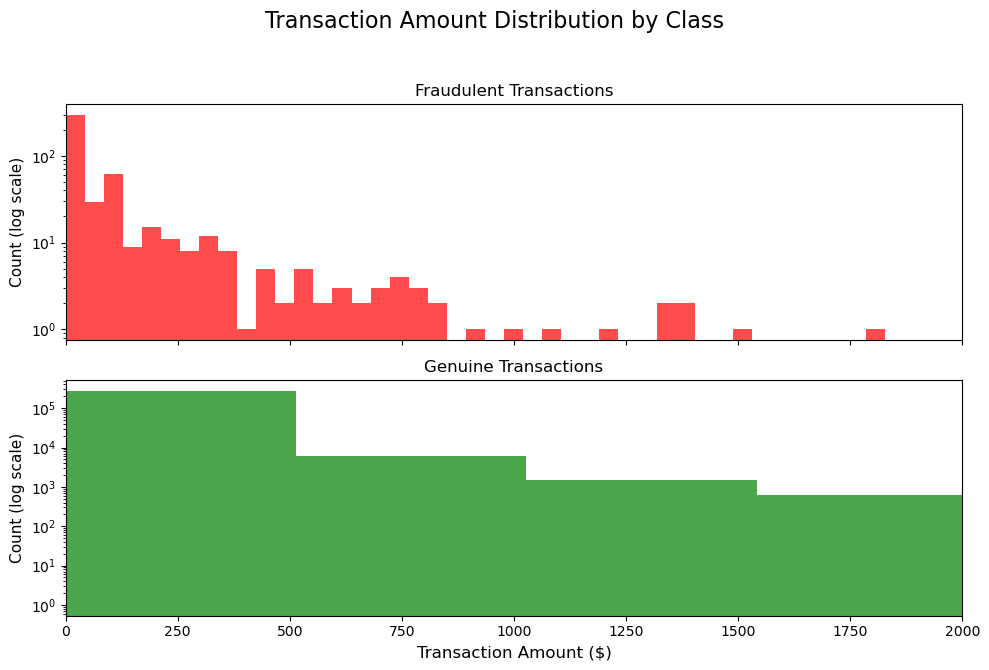

In [6]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

fig, (ax_fraud, ax_normal) = plt.subplots(2, 1, sharex=True, figsize=(10, 7))
fig.suptitle('Transaction Amount Distribution by Class', fontsize=16)

bins = 50

ax_fraud.hist(fraud['Amount'], bins=bins, color='red', alpha=0.7)
ax_fraud.set_title('Fraudulent Transactions', fontsize=12)
ax_fraud.set_ylabel('Count (log scale)', fontsize=11)
ax_fraud.set_yscale('log')

ax_normal.hist(normal['Amount'], bins=bins, color='green', alpha=0.7)
ax_normal.set_title('Genuine Transactions', fontsize=12)
ax_normal.set_xlabel('Transaction Amount ($)', fontsize=12)
ax_normal.set_ylabel('Count (log scale)', fontsize=11)
ax_normal.set_yscale('log')

plt.xlim((0, 2000))  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

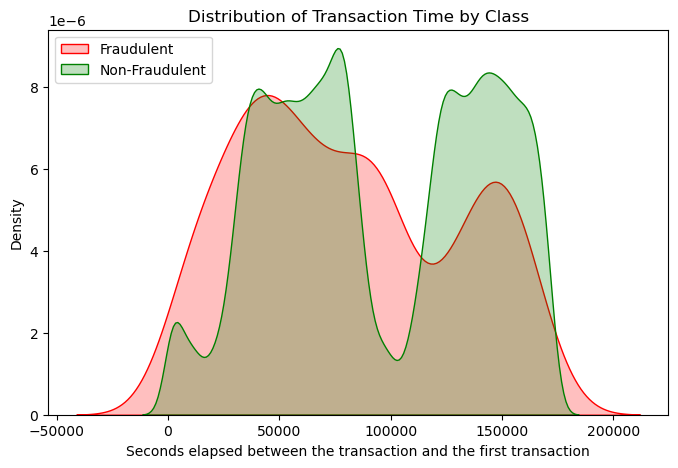

In [7]:
plt.figure(figsize=(8, 5))

sns.kdeplot(data=fraud, x='Time', label='Fraudulent', fill=True, color='red')
sns.kdeplot(data=normal, x='Time', label='Non-Fraudulent', fill=True, color='green')

plt.xlabel('Seconds elapsed between the transaction and the first transaction')
plt.title('Distribution of Transaction Time by Class')
plt.legend()
plt.show()

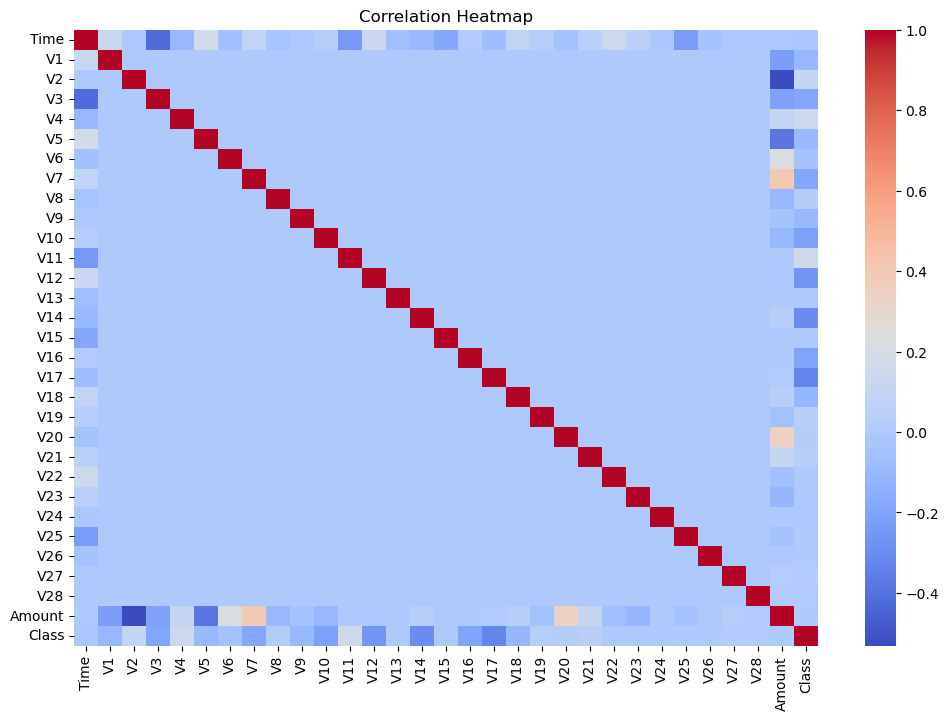

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

In [9]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [10]:
print("\n Before SMOTE:\n", y.value_counts())
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("\n After SMOTE:\n", y_res.value_counts())


 Before SMOTE:
 Class
0    284315
1       492
Name: count, dtype: int64

 After SMOTE:
 Class
0    284315
1    284315
Name: count, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()

X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
400282,-1.780116,3.963293,-5.668158,6.386319,-0.867880,-1.589397,-4.441890,0.975330,-3.062526,-6.722725,...,0.811914,1.080510,0.506998,-0.377750,-0.468684,0.019308,0.133770,0.695289,0.053624,-0.421049
439696,0.260022,1.612283,-1.445149,3.955159,-1.280805,-0.710533,-2.455214,0.658813,-1.743203,-2.857761,...,0.294667,0.332814,-0.299752,-0.008317,0.252095,0.487002,-0.010189,0.594294,0.313280,-0.423058
175832,-1.177030,-0.995436,0.018521,3.068924,2.820101,-0.899624,-0.078010,0.167392,-0.870654,0.859842,...,0.230646,0.497822,0.865131,0.712568,0.622570,-1.563615,-0.381675,0.241545,0.404146,-0.098196
251646,-0.425295,0.478010,1.629088,0.471707,-0.083214,0.667631,0.370210,0.241764,0.208688,-0.611770,...,0.118323,0.161285,0.380461,0.091423,0.420740,-0.426969,-0.732546,0.203675,0.200068,-0.032528
112160,-0.994357,-0.431953,2.941254,1.891170,-0.764679,1.212436,-0.427373,0.531441,0.847945,-0.760119,...,0.434266,0.116894,0.532274,0.088216,0.130351,0.435101,-0.016611,0.067393,0.022923,0.163519


In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} AUC Score: {auc:.4f}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.9469
Logistic Regression AUC Score: 0.9891
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589


Training Random Forest...
Random Forest Accuracy: 0.9999
Random Forest AUC Score: 1.0000
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Training XGBoost...
XGBoost Accuracy: 0.9997
XGBoost AUC Score: 1

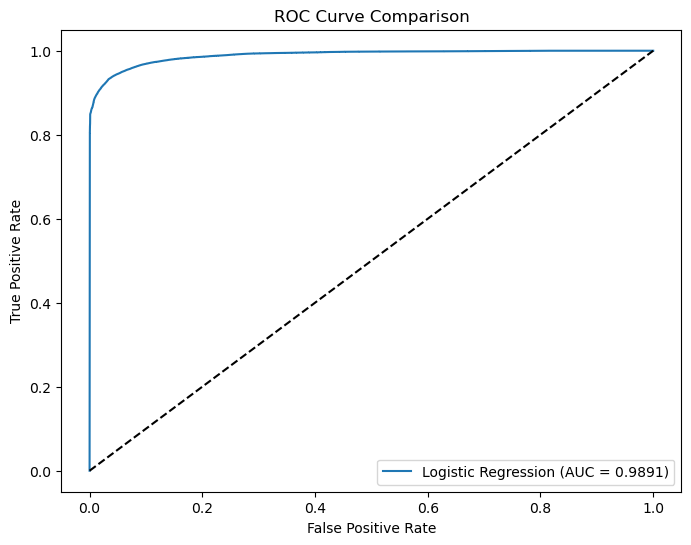

In [18]:
plt.figure(figsize=(8,6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res["model"].predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['auc']:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [19]:
best_model_name = max(results, key=lambda x: results[x]["auc"])
best_model = results[best_model_name]["model"]


 Best Model: Logistic Regression


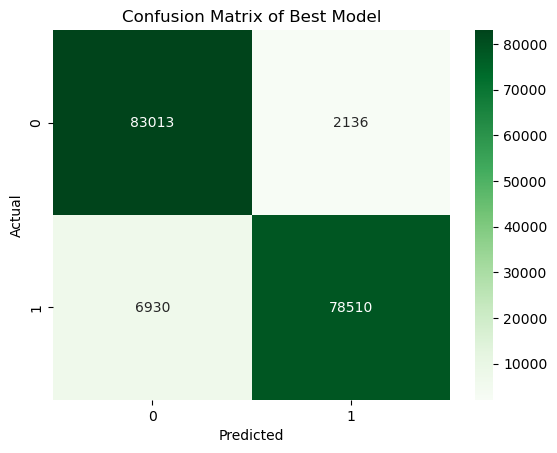

In [20]:
print(f"\n Best Model: {best_model_name}")
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix of Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()